In [6]:
import pandas as pd
from wave import open as open_wave
import numpy as np

from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

## Opening the audio file to construct the signal

### There are three audio files 

##### The names of the audio files is the format 'Audio_<date>_<time>.wav'. The three instance are as follows - 
##### event 1: 2024-03-09_23.41.07
##### event 2: 2024-03-10_11.21.01
##### event 3: 2024-03-10_13.13.06

##### Each of the above instances are used to create the analysis below. 

In [2]:
n= str('2024-03-10_13.13.06') # event instances mentioned above number of the audio file.  
ch=1

In [3]:
raw = open_wave(f'Audio_{n}_Ch{ch}.wav','rb')
signal= raw.readframes(-1)
signal = np.frombuffer(signal, dtype=np.int16)
f_rate=raw.getframerate() 

### creating a time vector to plot the signal  

In [7]:
time = np.linspace( 
        0, # start 
        len(signal) / f_rate, 
        num = len(signal) 
    ) 

In [ ]:
plt.figure(1) 
plt.title('TEA clip '+ n) 
plt.xlabel('Time (s)') 
plt.ylabel('Amplitude')
plt.plot(time, signal) 
plt.savefig('./plots/tea_'+n+'_signal.png')
plt.show() 

## METHOD 1: Finding dominant frequencies using FFT 

##### we use fourier transform analysis to identify coonstituent frequencies in the above signal. Note that we do not use the 'rfft' or real FFT even if the signal is real. The reason for this is to retain the directionality of frequencies i.e. +ve or forward going frequencies or -ve or reverse frequencies. These can potentially be a way of identifying/separating out the frequency of the vibrations. 

##### for example: the instrument can have a base continuum sound with a specific frequency(s) that can be identied as positive while an unexpected/resistive vibration could be detected as a -ve frequency. 

In [8]:
#sig_fft = fftpack.fft(signal)
sig_fft=fft(signal)
power = np.abs(sig_fft)**2
#sample_freq = fftpack.fftfreq(len(signal),time)
sample_freq = fftfreq(len(signal),time)


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/fft/helper.py:162: RuntimeWarning: divide by zero encountered in divide
  val = 1.0 / (n * d)
/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-8.0.0/lib/python3.11/site-packages/numpy/fft/helper.py:169: RuntimeWarning: invalid value encountered in multiply
  return results * val


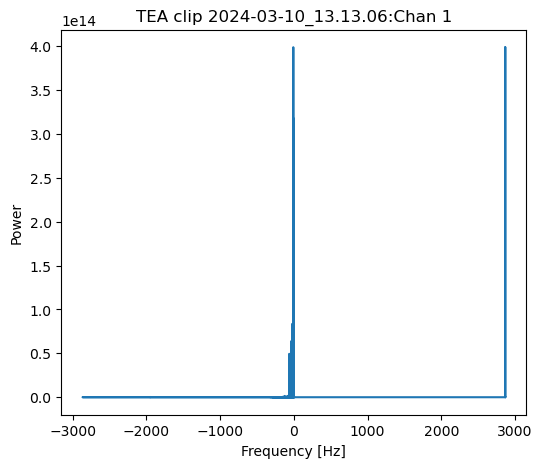

In [14]:
plt.figure(figsize=(6, 5))
plt.plot(sample_freq*f_rate, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title('TEA clip '+n+':Chan '+str(ch))
plt.savefig('./plots/tea_'+n+'_fft_freq.png')
plt.show()

### Conclusion: The identified are too small to be even detectable. Hence this analysis cannot give us a conlusive identification of the frequency of the vibrations. 
#### This is applicable to all the three audio signals even if two of them were captured during the top-end assembly vibration event.


## METHOD 2: Finding dominant frequencies using Power spectral density (PSD) 

### SANITY CHECK OF THE FFT

##### we pick the frequency with the highest power, use it to construct a signal and substract it from the original signal. If the FFT has been done correctly, the residual should be minimal but with similar shape. This is signal filtering using only dominant /peak frequency.  

In [12]:
#peak_freq = sample_freq[power.argmax()]
#high_freq_fft = sig_fft.copy()
#high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
#filtered_sig = fftpack.ifft(high_freq_fft)
#filtered_sig = ifft(high_freq_fft)

NameError: name 'ifft' is not defined

In [ ]:
#plt.figure(figsize=(6, 5))
#plt.plot(time, signal, label='Original signal')
#plt.plot(time, filtered_sig, linewidth=3, label='Filtered signal')
#plt.xlabel('Time [s]')
#plt.legend(loc='best')
#plt.title('TEA clip_'+n+': Peak frequency removed')
#plt.savefig('./plots/tea_'+n+'_filtered_signal.png')
#plt.show()